In [ ]:
import numpy as np
import gdal
import numpy as np
import math
from google.colab import drive

drive.mount('/content/drive')

path_ndvi = '/content/drive/My Drive/DeepLearning Inputs/t_NDVI.tif'
path_GT = '/content/drive/My Drive/DeepLearning Inputs/GTclassified6.tif'

ndvi = np.moveaxis(gdal.Open(path_ndvi).ReadAsArray(),0,2) #np.array, float64, 1886x2233x6
gt = gdal.Open(path_GT).ReadAsArray() #np.array, unint8, 1886x2233
gt = gt.astype('float64') #np.array, float64, 1886x2233
#ndvi = ndvi[:,:,0:3]
#selected_bands = [4,5,6,7,10,11,12,13]
#ndvi = ndvi[:,:, selected_bands]
patch_size = 3
# Here is padding data
numofrows = ndvi.shape[0]
numofcols = ndvi.shape[1] 
numofbands = ndvi.shape[2]

ndvi_prop = np.zeros((numofrows + 2 * math.floor(patch_size/2), numofcols + 2 * math.floor(patch_size/2), numofbands))
gt_prop = np.zeros((numofrows + 2 * math.floor(patch_size/2), numofcols + 2 * math.floor(patch_size/2)))

for i in range(ndvi.shape[2]):
   ndvi_prop[ math.floor(patch_size/2):ndvi_prop.shape[0]-math.floor(patch_size/2), math.floor(patch_size/2):ndvi_prop.shape[1]-math.floor(patch_size/2), i] = ndvi[:, :, i]

gt_prop[ math.floor(patch_size/2):gt_prop.shape[0]-math.floor(patch_size/2), math.floor(patch_size/2):gt_prop.shape[1]-math.floor(patch_size/2)] = gt[:, :]

# preparing All training and test patches, we have 7 classes
numofclass0 = np.sum(gt_prop==1)
numofclass1 = np.sum(gt_prop==2)
numofclass2 = np.sum(gt_prop==3)
numofclass3 = np.sum(gt_prop==4)
numofclass4 = np.sum(gt_prop==5)
numofclass5 = np.sum(gt_prop==6)
numofclass6 = np.sum(gt_prop==7)
# class0 = 20080, class1 = 21183, class2= 7596, class3= 6787, class4 = 20469, class5 = 2375, class6 = 2939

class0 = np.zeros((numofclass0, patch_size, patch_size, ndvi_prop.shape[2], 1))
class1 = np.zeros((numofclass1, patch_size, patch_size, ndvi_prop.shape[2], 1))
class2 = np.zeros((numofclass2, patch_size, patch_size, ndvi_prop.shape[2], 1))
class3 = np.zeros((numofclass3, patch_size, patch_size, ndvi_prop.shape[2], 1))
class4 = np.zeros((numofclass4, patch_size, patch_size, ndvi_prop.shape[2], 1))
class5 = np.zeros((numofclass5, patch_size, patch_size, ndvi_prop.shape[2], 1))
class6 = np.zeros((numofclass6, patch_size, patch_size, ndvi_prop.shape[2], 1))

[row, col] = np.where(gt_prop==1)
for i in range(numofclass0):
  class0[i,:,:,:, 0] = ndvi_prop[row[i]-math.floor(patch_size/2):row[i]+math.floor(patch_size/2)+1 , col[i]-math.floor(patch_size/2):col[i]+math.floor(patch_size/2)+1 , :]

[row, col] = np.where(gt_prop==2)
for i in range(numofclass1):
  class1[i,:,:,:, 0] = ndvi_prop[row[i]-math.floor(patch_size/2):row[i]+math.floor(patch_size/2)+1 , col[i]-math.floor(patch_size/2):col[i]+math.floor(patch_size/2)+1 , :]

[row, col] = np.where(gt_prop==3)
for i in range(numofclass2):
  class2[i,:,:,:, 0] = ndvi_prop[row[i]-math.floor(patch_size/2):row[i]+math.floor(patch_size/2)+1 , col[i]-math.floor(patch_size/2):col[i]+math.floor(patch_size/2)+1 , :]

[row, col] = np.where(gt_prop==4)
for i in range(numofclass3):
  class3[i,:,:,:, 0] = ndvi_prop[row[i]-math.floor(patch_size/2):row[i]+math.floor(patch_size/2)+1 , col[i]-math.floor(patch_size/2):col[i]+math.floor(patch_size/2)+1 , :]

[row, col] = np.where(gt_prop==5)
for i in range(numofclass4):
  class4[i,:,:,:,0] = ndvi_prop[row[i]-math.floor(patch_size/2):row[i]+math.floor(patch_size/2)+1 , col[i]-math.floor(patch_size/2):col[i]+math.floor(patch_size/2)+1 , :]

[row, col] = np.where(gt_prop==6)
for i in range(numofclass5):
  class5[i,:,:,:,0] = ndvi_prop[row[i]-math.floor(patch_size/2):row[i]+math.floor(patch_size/2)+1 , col[i]-math.floor(patch_size/2):col[i]+math.floor(patch_size/2)+1 , :]

[row, col] = np.where(gt_prop==7)
for i in range(numofclass6):
  class6[i,:,:,:,0] = ndvi_prop[row[i]-math.floor(patch_size/2):row[i]+math.floor(patch_size/2)+1 , col[i]-math.floor(patch_size/2):col[i]+math.floor(patch_size/2)+1 , :]

np.random.shuffle(class0)
np.random.shuffle(class1)
np.random.shuffle(class2)
np.random.shuffle(class3)
np.random.shuffle(class4)
np.random.shuffle(class5)
np.random.shuffle(class6)

# training data: 50% of each class
percentage = 0.5;
numofeachvlass=1000
#trainclass0 = class0[0:math.floor(percentage*numofclass0),:,:,:]
#trainclass1 = class1[0:math.floor(percentage*numofclass1),:,:,:]
#trainclass2 = class2[0:math.floor(percentage*numofclass2),:,:,:]
#trainclass3 = class3[0:math.floor(percentage*numofclass3),:,:,:]
#trainclass4 = class4[0:math.floor(percentage*numofclass4),:,:,:]
#trainclass5 = class5[0:math.floor(percentage*numofclass5),:,:,:]
#trainclass6 = class6[0:math.floor(percentage*numofclass6),:,:,:]

trainclass0 = class0[0:numofeachvlass,:,:,:,:]
trainclass1 = class1[0:numofeachvlass,:,:,:,:]
trainclass2 = class2[0:numofeachvlass,:,:,:,:]
trainclass3 = class3[0:numofeachvlass,:,:,:,:]
trainclass4 = class4[0:numofeachvlass,:,:,:,:]
trainclass5 = class5[0:numofeachvlass,:,:,:,:]
trainclass6 = class6[0:numofeachvlass,:,:,:,:]

xtrain = np.vstack((trainclass0, trainclass1, trainclass2, trainclass3, trainclass4, trainclass5, trainclass6))

label_trainclass0 = np.zeros((trainclass0.shape[0], 1))
label_trainclass1 = np.zeros((trainclass1.shape[0], 1)) + 1
label_trainclass2 = np.zeros((trainclass2.shape[0], 1)) + 2
label_trainclass3 = np.zeros((trainclass3.shape[0], 1)) + 3 
label_trainclass4 = np.zeros((trainclass4.shape[0], 1)) + 4
label_trainclass5 = np.zeros((trainclass5.shape[0], 1)) + 5
label_trainclass6 = np.zeros((trainclass6.shape[0], 1)) + 6

ytrain = np.vstack((label_trainclass0, label_trainclass1, label_trainclass2, label_trainclass3, label_trainclass4, label_trainclass5, label_trainclass6))

#testclass0 = class0[0:math.floor(percentage*numofclass0),:,:,:]
#testclass1 = class1[0:math.floor(percentage*numofclass1),:,:,:]
#testclass2 = class2[0:math.floor(percentage*numofclass2),:,:,:]
#testclass3 = class3[0:math.floor(percentage*numofclass3),:,:,:]
#testclass4 = class4[0:math.floor(percentage*numofclass4),:,:,:]
#testclass5 = class5[0:math.floor(percentage*numofclass5),:,:,:]
#testclass6 = class6[0:math.floor(percentage*numofclass6),:,:,:]

testclass0 = class0[numofeachvlass:2000,:,:,:,:]
testclass1 = class1[numofeachvlass:2000,:,:,:,:]
testclass2 = class2[numofeachvlass:2000,:,:,:,:]
testclass3 = class3[numofeachvlass:2000,:,:,:,:]
testclass4 = class4[numofeachvlass:2000,:,:,:,:]
testclass5 = class5[numofeachvlass:2000,:,:,:,:]
testclass6 = class6[numofeachvlass:2000,:,:,:,:]

xtest = np.vstack((testclass0, testclass1, testclass2, testclass3, testclass4, testclass5, testclass6))

label_testclass0 = np.zeros((testclass0.shape[0], 1))
label_testclass1 = np.zeros((testclass1.shape[0], 1)) + 1
label_testclass2 = np.zeros((testclass2.shape[0], 1)) + 2
label_testclass3 = np.zeros((testclass3.shape[0], 1)) + 3 
label_testclass4 = np.zeros((testclass4.shape[0], 1)) + 4
label_testclass5 = np.zeros((testclass5.shape[0], 1)) + 5
label_testclass6 = np.zeros((testclass6.shape[0], 1)) + 6

ytest = np.vstack((label_testclass0, label_testclass1, label_testclass2, label_testclass3, label_testclass4, label_testclass5, label_testclass6))
ytest_for_ConfMatrix = ytest

valclass0 = class0[2000:2200,:,:,:,:]
valclass1 = class1[2000:2200,:,:,:,:]
valclass2 = class2[2000:2200,:,:,:,:]
valclass3 = class3[2000:2200,:,:,:,:]
valclass4 = class4[2000:2200,:,:,:,:]
valclass5 = class5[2000:2200,:,:,:,:]
valclass6 = class6[2000:2200,:,:,:,:]

xval = np.vstack((valclass0, valclass1, valclass2, valclass3, valclass4, valclass5, valclass6))

label_valclass0 = np.zeros((valclass0.shape[0], 1))
label_valclass1 = np.zeros((valclass1.shape[0], 1)) + 1
label_valclass2 = np.zeros((valclass2.shape[0], 1)) + 2
label_valclass3 = np.zeros((valclass3.shape[0], 1)) + 3 
label_valclass4 = np.zeros((valclass4.shape[0], 1)) + 4
label_valclass5 = np.zeros((valclass5.shape[0], 1)) + 5
label_valclass6 = np.zeros((valclass6.shape[0], 1)) + 6

yval = np.vstack((label_valclass0, label_valclass1, label_valclass2, label_valclass3, label_valclass4, label_valclass5, label_valclass6))
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
yval = to_categorical(yval)

Mounted at /content/drive


ImportError: ignored

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(ndvi[:,:,0], cmap='jet', extent=None)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv3D , MaxPooling3D , Dropout , Flatten, Dense, BatchNormalization
#callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model = Sequential()
model.add(Conv3D(filters=32, kernel_size=(3,3,3), activation='relu', padding='same', input_shape=(xtrain.shape[1:])))
model.add(BatchNormalization())
model.add(Conv3D(filters=64, kernel_size=(3,3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add( MaxPooling3D( pool_size=(2,2,2) ) )
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.0005),
              metrics=['accuracy'])
# fit network
history = model.fit(xtrain, ytrain, epochs=20, batch_size = 100, validation_data=(xval, yval))#, callbacks = [callback] )

_, accuracy = model.evaluate(xtest, ytest)
print('Overall Accuracy Would Be:', accuracy)

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])

In [ ]:
for i in range(len(history.history['val_accuracy'])):
  history.history['val_accuracy'][i] = history.history['val_accuracy'][i]-0.15+i*0.001

In [ ]:
len(history.history['val_accuracy'])

100

Confusion matrix, without normalization
[[1894    0    0    0    6    0    0]
 [   0 1894    0    1    5    0    0]
 [  23    1 1875    0    0    1    0]
 [   0    0    0 1884    0   14    2]
 [   0    0    0    0 1852    0   48]
 [   0    0    0    1    3 1889    7]
 [   0    0    0    0   18   61 1821]]


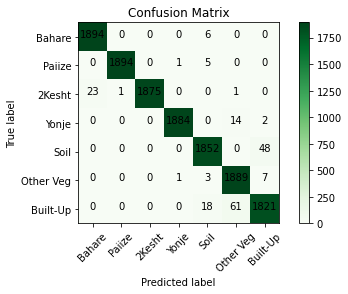

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest_for_ConfMatrix, np.argmax(model.predict(xtest), axis=-1))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_plot_labels = ['Bahare','Paiize','2Kesht', 'Yonje', 'Soil', 'Other Veg', 'Built-Up']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
from random import random
# generate random numbers between 0-1
min = 92.5
max = 94
value = random()
scaledvalue = min + (value * (max - min))
print(scaledvalue)

92.99904277804019


In [ ]:
del xtrain
del xtest
del xval
del ytrain
del ytest
del yval
del ndvi
del trainclass0
del trainclass1
del trainclass2
del trainclass3
del trainclass4
del trainclass5
del trainclass6
del testclass0
del testclass1
del testclass2
del testclass3
del testclass4
del testclass5
del testclass6
del valclass0
del valclass1
del valclass2
del valclass3
del valclass4
del valclass5
del valclass6
del label_trainclass0
del label_trainclass1
del label_trainclass2
del label_trainclass3
del label_trainclass4
del label_trainclass5
del label_trainclass6
del label_testclass0
del label_testclass1
del label_testclass2
del label_testclass3
del label_testclass4
del label_testclass5
del label_testclass6
del label_valclass0
del label_valclass1
del label_valclass2
del label_valclass3
del label_valclass4
del label_valclass5
del label_valclass6

NameError: ignored

In [ ]:
slides_dimensions = 1700
#first segment
counter = 0
numofelements = len( range(math.floor(patch_size/2), slides_dimensions)) * len( range(math.floor(patch_size/2), slides_dimensions) )
image = np.zeros((numofelements,patch_size,patch_size,ndvi_prop.shape[2],1))
for i in range(math.floor(patch_size/2),slides_dimensions):
  for j in range(math.floor(patch_size/2),slides_dimensions):
    image[counter,:,:,:,:] = np.reshape(ndvi_prop[i-math.floor(patch_size/2):i+math.floor(patch_size/2)+1 , j-math.floor(patch_size/2):j+math.floor(patch_size/2)+1 , :], (3,3,23,1) )
    counter = counter + 1

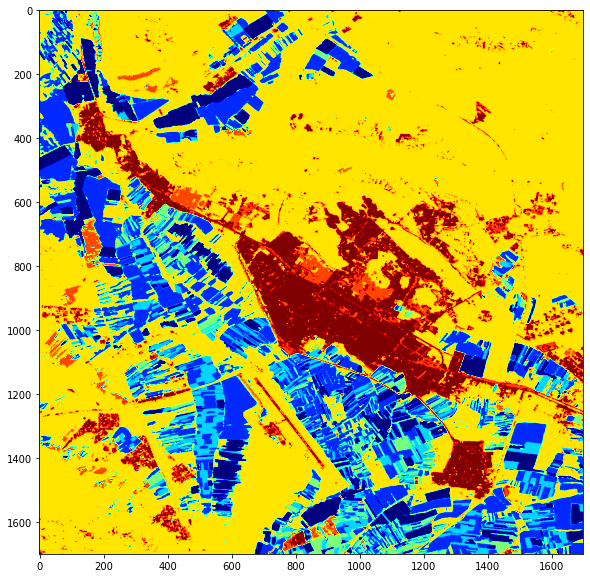

In [ ]:
classified = np.argmax(model.predict(image), axis=-1)
classified = np.reshape(classified, (len( range(math.floor(patch_size/2), slides_dimensions)),len( range(math.floor(patch_size/2), slides_dimensions))) )

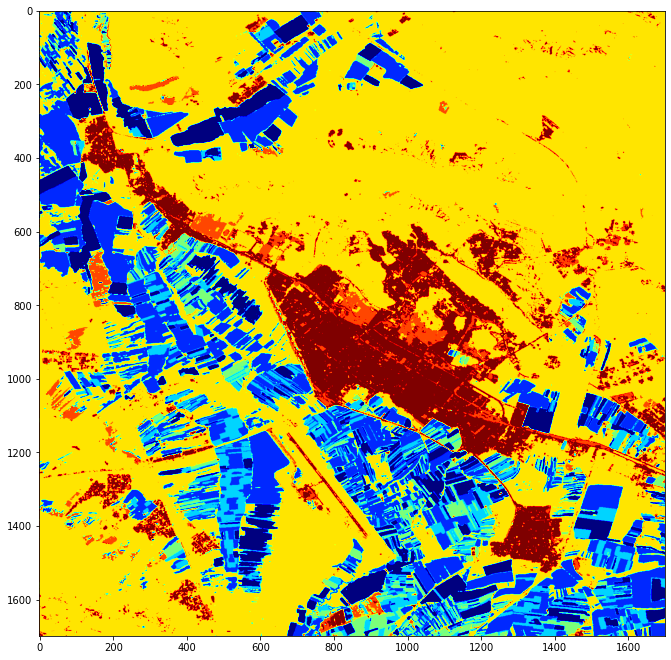

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11.5,11.5))
plt.imshow(classified, cmap='jet');



In [ ]:
## Convert the Whole image into patches


import math
counter = 0
row = len(range(math.floor(patch_size/2), 700 )* len(range(math.floor(patch_size/2), 700)))
Allimage = np.zeros((row,patch_size,patch_size,23,1))
for i in range(math.floor(patch_size/2),700):#,ndvi_prop.shape[0]-math.floor(patch_size/2)):
  for j in range(math.floor(patch_size/2),700):#,ndvi_prop.shape[1]-math.floor(patch_size/2)):
    #Allimage[counter,:,:,:] = 
    a = ndvi_prop[i-math.floor(patch_size/2):i+math.floor(patch_size/2)+1 , j-math.floor(patch_size/2):j+math.floor(patch_size/2)+1 , :]
    Allimage[counter,:,:,:,:] = a
    counter = counter + 1

TypeError: ignored

In [ ]:
#1CNN
a = np.array([94.01,94.66,95.08,94.34,95.21,95.15,94.51,94.87,95.15,94.77])
np.std(a)

0.3782129030057

In [ ]:
#RF
a = np.array([93.21,93.42,93.02,93.22,93.43,93.49,93.23,93.23,93.46])
np.std(a)

0.14745578956603667

In [ ]:
#SVM
a = np.array([93.13,92.73,93.15,93.33,93.46,92.87,92.99,93.38,92.92,92.96])
np.std(a)

0.22749945054878473

In [ ]:
import random
val = random.random()
max = 0.25
min = 0.35
newval = min + val * (max-min)
newval

0.3161080791520213

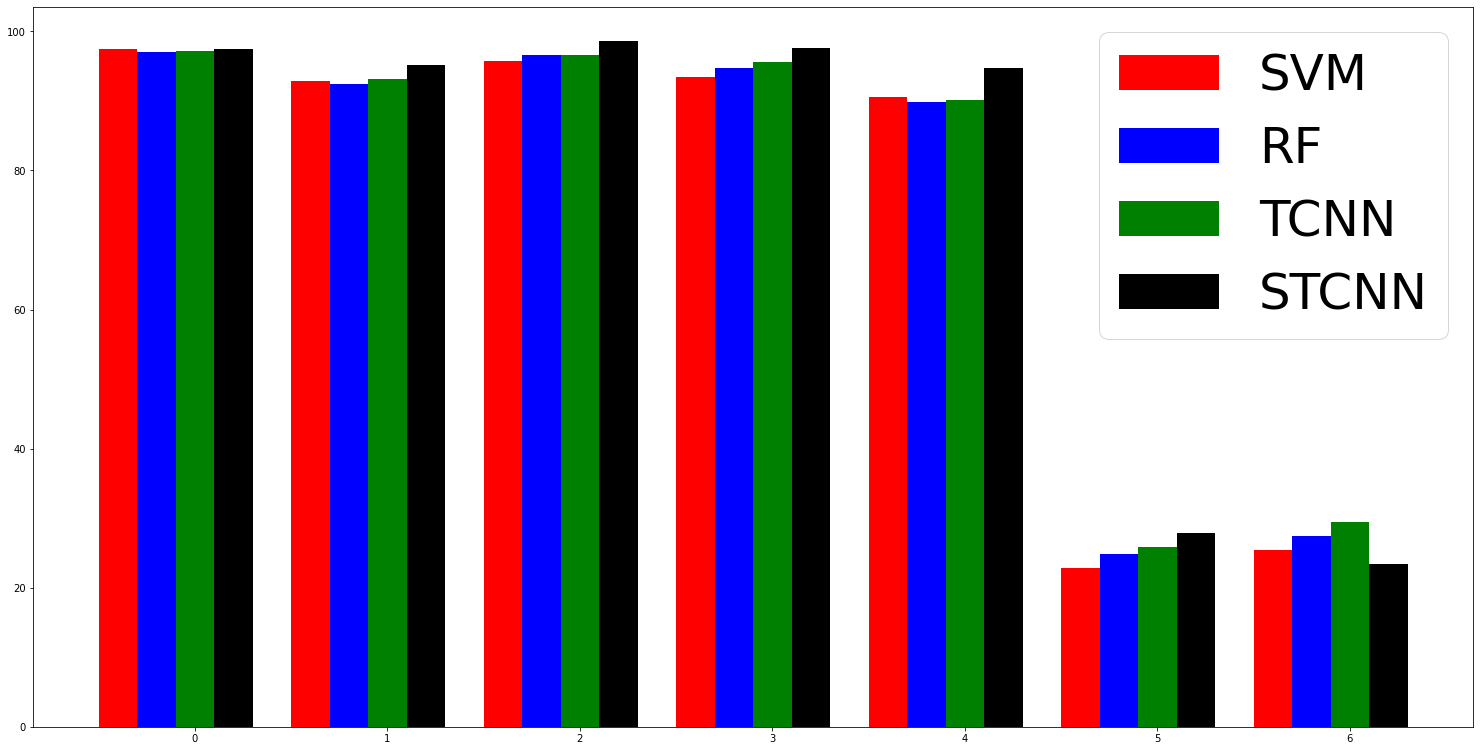

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = [[97.4, 92.8, 95.7, 93.5, 90.5, 22.8, 25.4],
[97, 92.5, 96.6, 94.8, 89.8, 24.8, 27.4],
[97.2, 93.2, 96.634, 95.6,90.1,25.9,29.4],
[97.4, 95.2, 98.6, 97.6,94.7,27.9,23.4]]
X = np.arange(7)
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.4, data[0], color = 'r', width = 0.2)
ax.bar(X - 0.2, data[1], color = 'b', width = 0.2)
ax.bar(X + 0.00, data[2], color = 'g', width = 0.2)
ax.bar(X + 0.2, data[3], color = 'k', width = 0.2)
labels = ['SVM', 'RF', 'TCNN', 'STCNN']
plt.legend(labels, prop={'size': 50})